In [1]:
import datetime
import time
import hashlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
class Block:
    """
    Classe que representa um bloco que será inserido em uma blockchain
    
    ...
    
    Atributos
    ---------
    block_n: int
        número do bloco dentro de uma blockchain
    data: str
        dado armazenado pelo bloco
    next: bloco
        ponteiro para o próximo bloco em uma blockchain
    hash: str
        hash correspondente ao bloco
    nonce: int
        número usado uma única vez, utilizado para o cálculo da hash do bloco
    prev_hash: str
        hash do bloco anterior em uma blockchain, também utilizado para cálculo da hash do bloco
    timestamp: datetime
        data de criação do bloco
    
    Métodos
    -------
    hash:
        Calcula a hash do bloco
    """
    block_n = 0
    data = None
    next = None
    hash = None
    nonce = 0
    prev_hash = 0x0
    timestamp = datetime.datetime.now()
    
    def __init__(self, data):
        """
        Parâmetros
        ----------
        data: str
            dado a ser armazenado pelo bloco
        """
        self.data = data
    
    def hash(self):
        """Cálcula a hash do bloco utilizando uma string contendo o nonce do bloco, o dado armazenado por ele,
        a hash do bloco anterior, a data de criação do bloco e o número do bloco como input da hash"""
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') + 
            str(self.data).encode('utf-8') + 
            str(self.prev_hash).encode('utf-8') + 
            str(self.timestamp).encode('utf-8') + 
            str(self.block_n).encode('utf-8')
        )
        return h.hexdigest()
    
    def __str__(self):
        return "Block number: {}\nBlock Hash: {}\nBlock Data: {}\nHashes:{}\n".format(self.block_n, self.hash(), self.data, self.nonce)
        

In [3]:
class BlockChain:
    hashes_guessed = 0
    
    maxNonce = 2**32
    target = 0
    
    block = Block("Genesis")
    head = block
    
    def __init__(self, diff):
        self.target = 2**(256-diff)
        self.hasshes_guessed = []
    
    def add(self, block):
        block.prev_hash = self.block.hash()
        block.block_n = self.block.block_n + 1
        
        self.block.next = block
        self.block = self.block.next
    
    def mine(self, block):
        for n in range(self.maxNonce):
            if int(block.hash(), 16) <= self.target:
                self.add(block)
                self.hashes_guessed += block.nonce
                #print(block)
                break
            else:
                block.nonce+=1

In [99]:
total_time = []
total_hashes = []
diff_range= list(range(10,21))

for diffs in diff_range:
    blockchain = BlockChain(diffs)
    start = time.time()
    
    for blocks in range(10):
        blockchain.mine(Block("Block {}".format(blocks+1)))
    
    total_time.append(time.time() - start)
    total_hashes.append(blockchain.hashes_guessed)
    print("Blockchain with {} diff".format(diffs))

Blockchain with 10 diff
Blockchain with 11 diff
Blockchain with 12 diff
Blockchain with 13 diff
Blockchain with 14 diff
Blockchain with 15 diff
Blockchain with 16 diff
Blockchain with 17 diff
Blockchain with 18 diff
Blockchain with 19 diff
Blockchain with 20 diff


In [113]:
data_dict = {'diff': diff_range, 'time': total_time, 'hashes': total_hashes}
df = pd.DataFrame.from_dict(data_dict)
df

,diff,time,hashes
0,10,0.088472,13094
1,11,0.100203,17851
2,12,0.222914,39956
3,13,0.431122,80434
4,14,1.209903,243788
5,15,2.797577,518731
6,16,5.476521,1052683
7,17,7.425915,1496265
8,18,11.646278,2473094
9,19,25.198824,5341718


[Text(0,0,'13094'),
 Text(0,0,'2055087'),
 Text(0,0,'4097080'),
 Text(0,0,'6139073'),
 Text(0,0,'8181066'),
 Text(0,0,'10223059'),
 Text(0,0,'12265052'),
 Text(0,0,'14307045')]

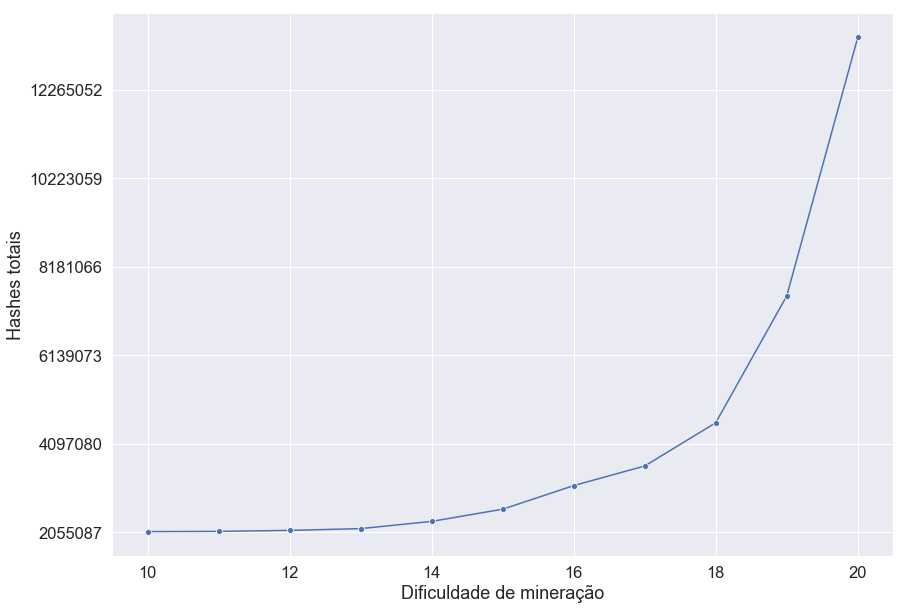

In [119]:
ticks = list(range(df['hashes'].min(), df['hashes'].max()*4, int(df['hashes'].mean())))
sns.set(style="darkgrid", font_scale=1.5)   
fig, ax = plt.subplots(figsize=(14, 10))

line = sns.lineplot(x='diff', y='hashes', data=df, marker='o')
line.set(ylabel="Hashes totais", xlabel="Dificuldade de mineração")
line.set_yticklabels(ticks)

[Text(0,0,'0'),
 Text(0,0,'9'),
 Text(0,0,'18'),
 Text(0,0,'27'),
 Text(0,0,'36'),
 Text(0,0,'45'),
 Text(0,0,'54'),
 Text(0,0,'63')]

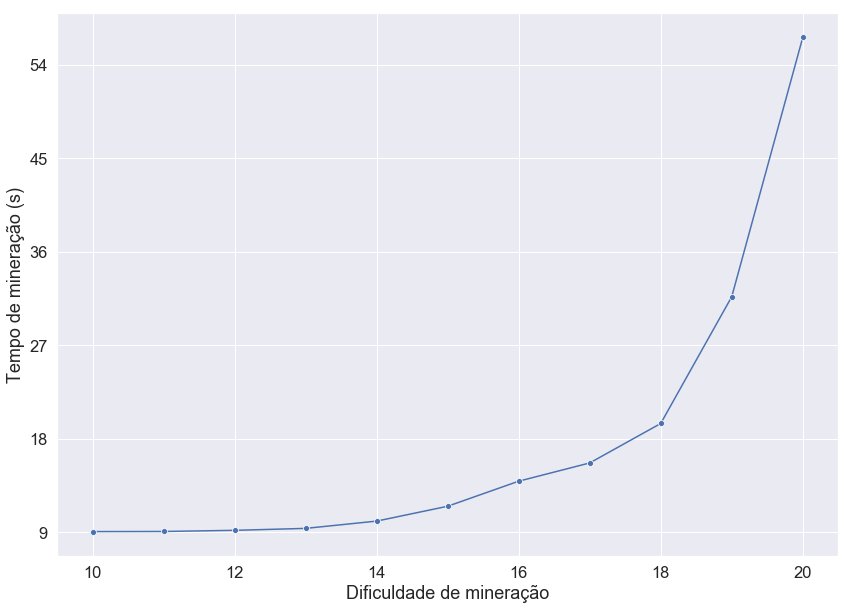

In [118]:
ticks = list(range(int(df['time'].min()), int(df['time'].max()*44), int(df['time'].mean())))
sns.set(style="darkgrid", font_scale=1.5)   
fig, ax = plt.subplots(figsize=(14, 10))

line = sns.lineplot(x='diff', y='time', data=df, marker='o')
line.set(ylabel="Tempo de mineração (s)", xlabel="Dificuldade de mineração")
line.set_yticklabels(ticks)